## Neural Network
neural network is for classification and regression

<img src='first_pic.PNG'/>
<img src='second_pic.PNG'/>

#### $h_0, h_1$ $and$ $h_2$ are called hidden units
#### each hidden unit in hidden layer computes a non linear function of input features resulting $v_0 ...$
#### neural network needs more time and computational power to learn a model compared to linear regression

<img src='third_pic.PNG'/>

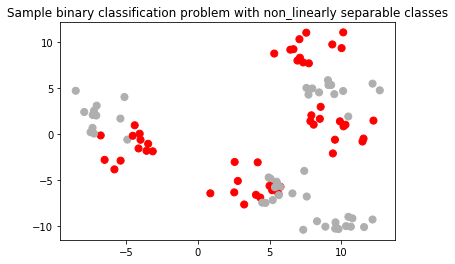

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF'])
X_D2,y_D2=make_blobs(n_samples=100,n_features=2, centers=8,
                     cluster_std=1.3,random_state=4)
y_D2=y_D2 % 2 # to make it binary
plt.figure()
plt.title('Sample binary classification problem with non_linearly separable classes')
plt.scatter(X_D2[:,0],X_D2[:,1],c=y_D2,marker='o',s=50,cmap=cmap_bold);

In [2]:
import numpy as np
import matplotlib.patches as mpatches
def to_plot(clf,X_train, X_test, y_train, y_test,class_1,class_2,x_min, x_max,y_min, y_max,ax,title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    mesh_step_size=0.1
    # how we create model
    ax.set_xlabel('height')
    ax.set_ylabel('width')
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    patch0 = mpatches.Patch(color='#FF0000', label=class_1)
    patch1 = mpatches.Patch(color='#00FF00', label=class_2)
    ax.legend(handles=[patch0, patch1])
    ax.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train , marker='o',s=50,cmap=cmap_bold,edgecolor = 'black')
    ax.scatter(x=X_test[:,0],y=X_test[:,1],c=y_test , marker='^',s=50,cmap=cmap_bold,edgecolor = 'black')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    test_score=clf.score(X_test,y_test)
    train_score=clf.score(X_train,y_train)
    title+=f'\n train_score: {train_score} test_score: {test_score}'
    ax.set_title(title)

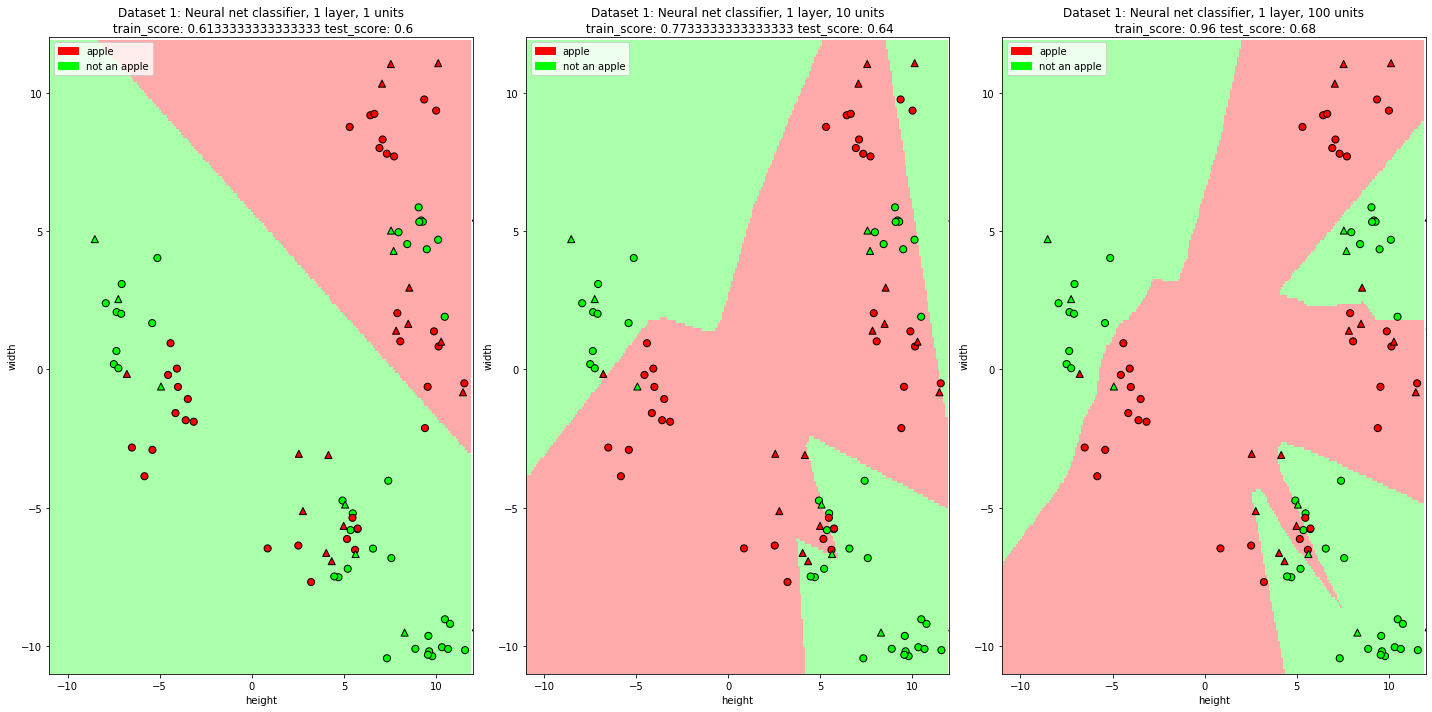

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2,random_state = 1)
fig, subaxes = plt.subplots(1, 3, figsize=(20,10))
 
for units, axis in zip([1, 10, 100],subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units],solver='lbfgs', random_state = 0).fit(X_train,y_train)
    title = f'Dataset 1: Neural net classifier, 1 layer, {units} units'
    to_plot(nnclf,X_train, X_test, y_train, y_test,class_1='apple',
                      class_2='not an apple',x_min=-11,x_max=12,y_min=-11,y_max=12,ax=axis,title=title)
    plt.tight_layout()

<img src='forth_pic.PNG'/>

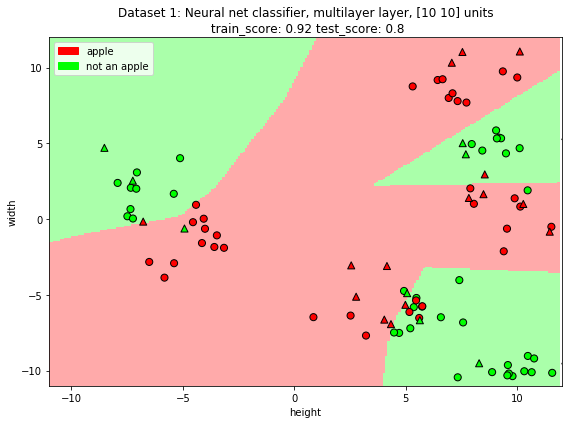

In [12]:
nnclf = MLPClassifier(hidden_layer_sizes = [10,10], random_state = 0, max_iter=1000).fit(X_train,y_train)
title = f'Dataset 1: Neural net classifier, multilayer layer, [10 10] units'
fig, subaxes = plt.subplots(1, 1, figsize=(8,6))
to_plot(nnclf,X_train, X_test, y_train, y_test,class_1='apple',
        class_2='not an apple',x_min=-11,x_max=12,y_min=-11,y_max=12,ax=subaxes,title=title)
plt.tight_layout()

## L2 Regularization with the Alpha Parameter

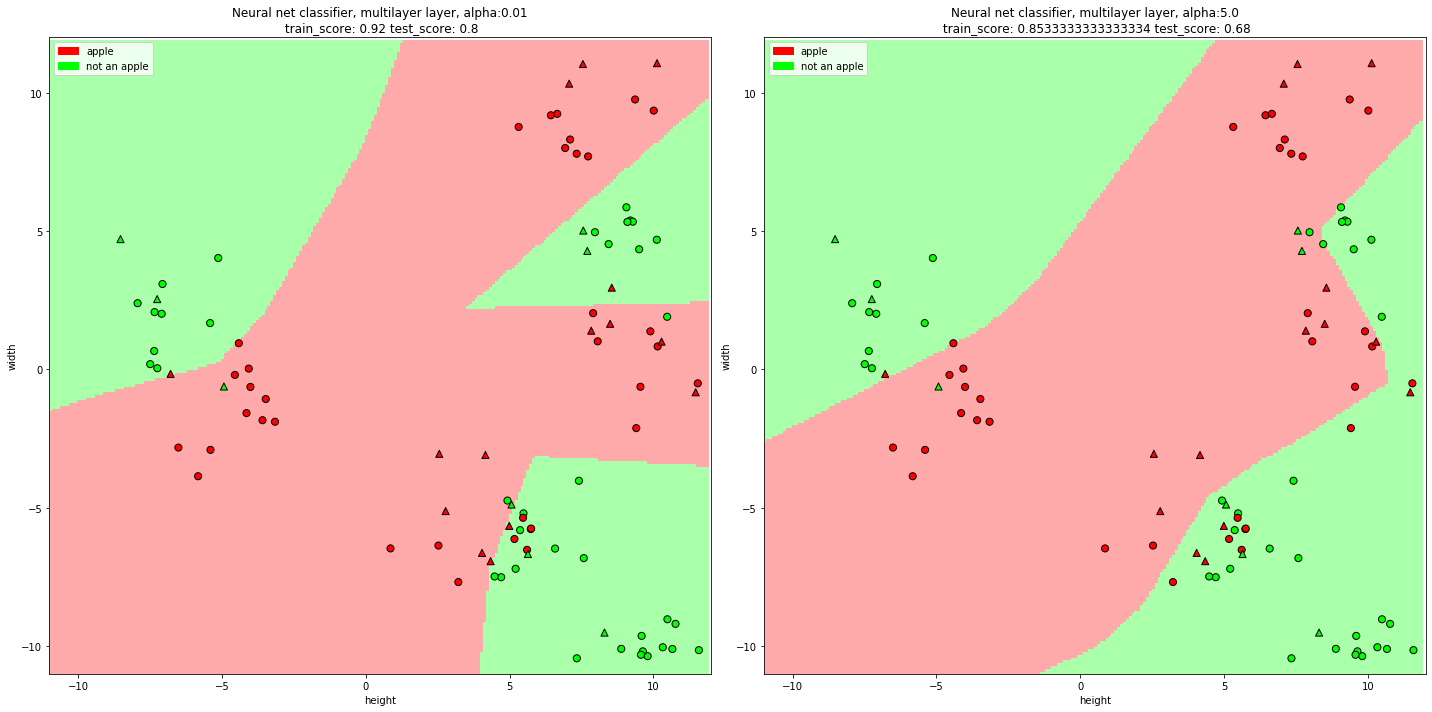

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_D2,y_D2,random_state = 1)
fig, subaxes = plt.subplots(1, 2, figsize=(20,10))

for alpha, axis in zip([0.01, 5.0],subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],alpha=alpha,solver='adam', random_state = 0, max_iter=1000).fit(X_train,y_train)
    title = f'Neural net classifier, multilayer layer, alpha:{alpha}'
    to_plot(nnclf,X_train, X_test, y_train, y_test,class_1='apple',
                      class_2='not an apple',x_min=-11,x_max=12,y_min=-11,y_max=12,ax=axis,title=title)
    plt.tight_layout()

__Cons:__
* Larger, more complex models require significant training time, data, and customization
* Careful preprocessing of the data is needed.
* A good choice when the features are of similar types, but less so when features of very different types.

__Prons:__
* They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.
